<a href="https://colab.research.google.com/github/Heveraldob12/API-Django-Rest-Framework/blob/master/projeto_vis_o_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalações e imports

**Preparando o Ambiente**

In [ ]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-por
!pip install pytesseract==0.3.9
! git clone https://github.com/sthemonica/text-recognize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 

In [ ]:
import pytesseract
import numpy as np
import cv2 
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow 


In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


--2023-03-23 14:31:35--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-03-23 14:31:36--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-03-23 14:31:36--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

Caminho das imagens

In [ ]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)


['/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png']


In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis('off') 
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()


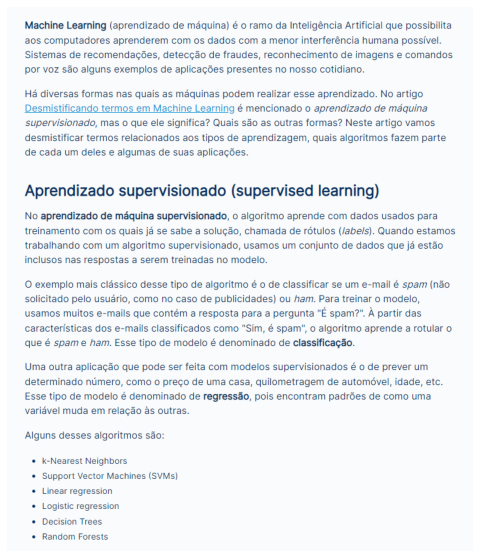

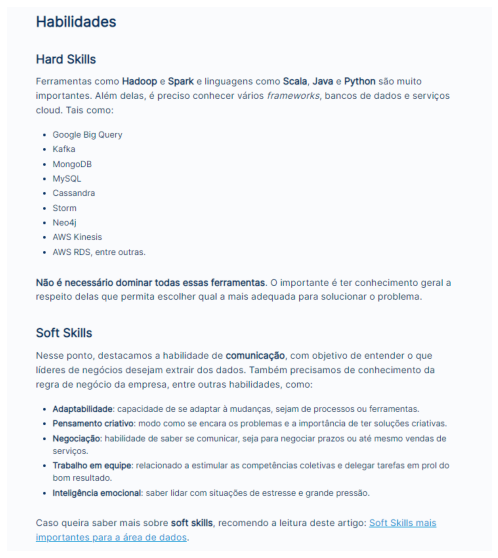

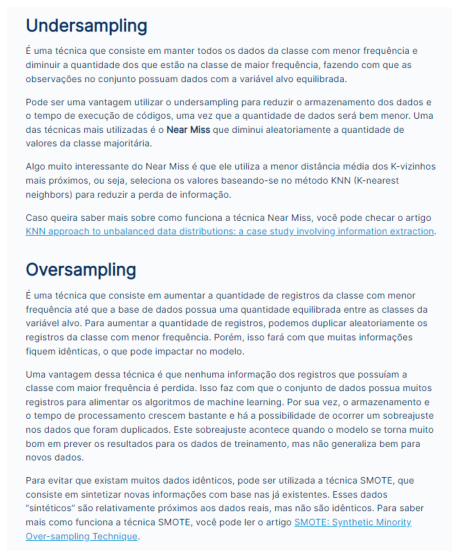

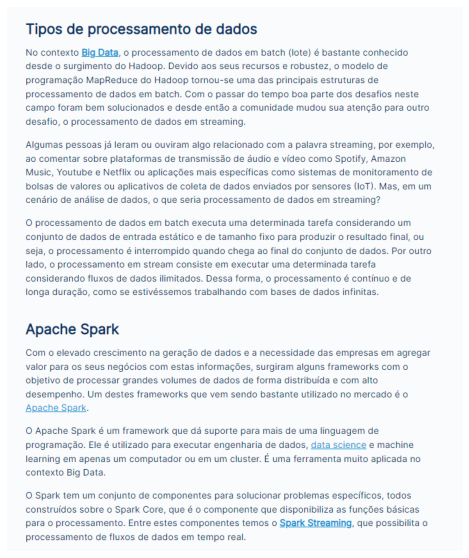

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem)
  mostrar(img)

In [ ]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata --psm 6'
def OCR_processa(img, config_tesseract=config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

## Reconhecendo o texto 

In [ ]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'


In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem) 
  nome_imagem = os.path.split(imagem)[-1]
  nome_divisao = '===================' + '\n' + str(nome_imagem) 
  texto_completo = texto_completo + nome_divisao + '\n'
  texto = OCR_processa(img) 
  texto_completo = texto_completo + texto 


In [ ]:
texto_completo

In [ ]:
## Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') 
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()


## Buscar algo


In [ ]:
termo_pesquisa= 'learning'

In [ ]:
with open(nome_txt) as f:
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]

In [ ]:
len(ocorrencias)

6

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem) 
  nome_imagem = os.path.split(imagem)[-1] 
  print('====================\n' + str(nome_imagem)) 

  texto = OCR_processa(img, config_tesseract) 

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)] 

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias))) 
  print('\n')



artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1


artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1


artigo-spark.png
Número de ocorrências para o termo: learning: 1




In [ ]:
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'


In [ ]:
min_conf = 30  #@param {type:"slider", min:0, max:100}


In [ ]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img) 
  draw = ImageDraw.Draw(img_pil) 
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor) 
  img = np.array(img_pil) 

  return img


Criar uma caixa no termo procurado

In [ ]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0

  for i in range(0, len(resultado['text'])): 
    confianca = int(resultado['conf'][i]) 
    if confianca > min_conf: 
      texto = resultado['text'][i] 
      if termo_pesquisa.lower() in texto.lower():
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) 
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14)

        num_ocorrencias += 1
  return img, num_ocorrencias


artigo-termos-ML.png
Número de ocorrências para learning em artigo-termos-ML.png: 3




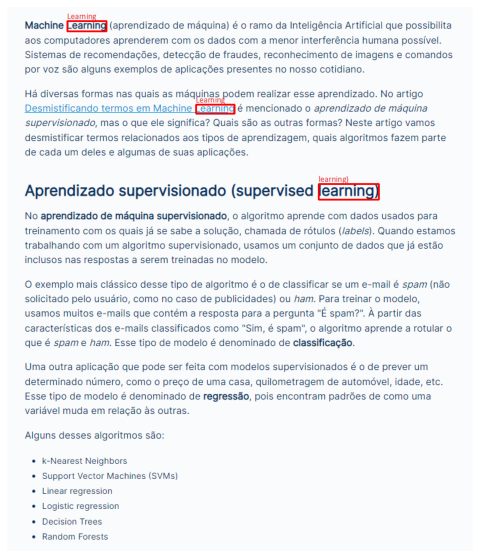

artigo-eng-dados.png
Número de ocorrências para learning em artigo-eng-dados.png: 0




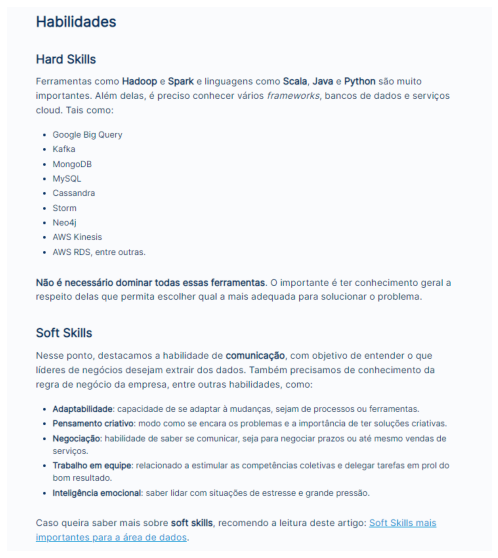

artigo-desbalanceamento.png
Número de ocorrências para learning em artigo-desbalanceamento.png: 1




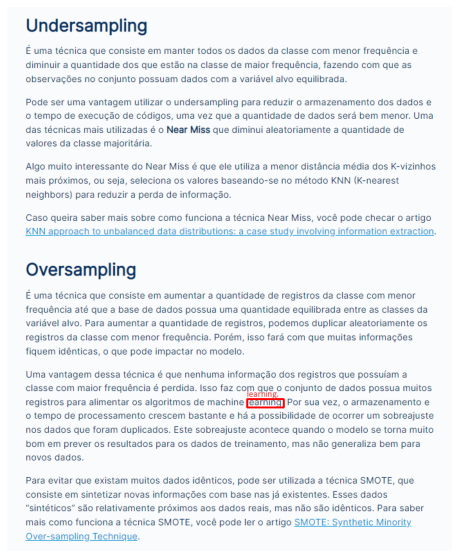

artigo-spark.png
Número de ocorrências para learning em artigo-spark.png: 1




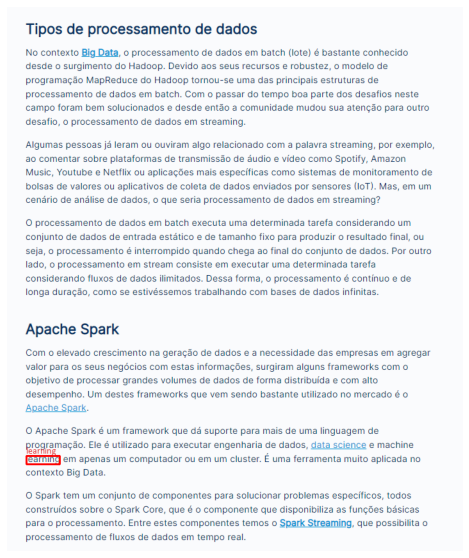

In [ ]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1] 
  print('===================\n' + str(nome_imagem))  

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) 
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
  print('\n')

  mostrar(img)
